In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import graphviz

In [99]:
df=pd.read_csv(r"D:\Road to Data Science\DataSets Given In Class\Heart Disease.csv")
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

#### A) Data Analysis:
a. Import the dataset
b. Get information about dataset (mean, max, min, quartiles etc.)
c. Find the correlation between all fields

##### Checking For Null Values

In [100]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [101]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [102]:
df.shape

(303, 14)

In [103]:
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [104]:
corr_ltion=df.corr()
corr_ltion

age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca        0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal      0.068001  0.210041 -0.161736  0.062210  0.098803 -0.032019   
target   -0.225439 -0.280937  0.433798 -0.144931 -0.085239 -0.028046   

           restecg   thalach     exang   oldpeak     slope        ca  \
age      -0.116211 -0.398522  0.096801  0.210013 -0.168814  0.276326   
sex      -0.058196 -0.044020  0.141664  0.096093 -0.030711  0.118261   
cp        0.044421  0.295762 -0.394280 -0.149230  0.119717 -0.181053   
trestbps -0.114103 -0.046698  0.067616  0.193216 -0.121475  0.101389   
chol     -0.151040 -0.009940  0.067023  0.053952 -0.004038  0.070511   
fbs      -0.084189 -0.008567  0.025665  0.005747 -0.059894  0.137979   
restecg   1.000000  0.044123 -0.070733 -0.058770  0.093045 -0.072042   
thalach   0.044123  1.000000 -0.378812 -0.344187  0.386784 -0.213177   
exang    -0.070733 -0.378812  1.000000  0.288223 -0.257748  0.115739   
oldpeak  -0.058770 -0.344187  0.288223  1.000000 -0.577537  0.222682   
slope     0.093045  0.386784 -0.257748 -0.577537  1.000000 -0.080155   
ca       -0.072042 -0.213177  0.115739  0.222682 -0.080155  1.000000   
thal     -0.011981 -0.096439  0.206754  0.210244 -0.104764  0.151832   
target    0.137230  0.421741 -0.436757 -0.430696  0.345877 -0.391724   

              thal    target  
age       0.068001 -0.225439  
sex       0.210041 -0.280937  
cp       -0.161736  0.433798  
trestbps  0.062210 -0.144931  
chol      0.098803 -0.085239  
fbs      -0.032019 -0.028046  
restecg  -0.011981  0.137230  
thalach  -0.096439  0.421741  
exang     0.206754 -0.436757  
oldpeak   0.210244 -0.430696  
slope    -0.104764  0.345877  
ca        0.151832 -0.391724  
thal      1.000000 -0.344029  
target   -0.344029  1.000000

<AxesSubplot:>

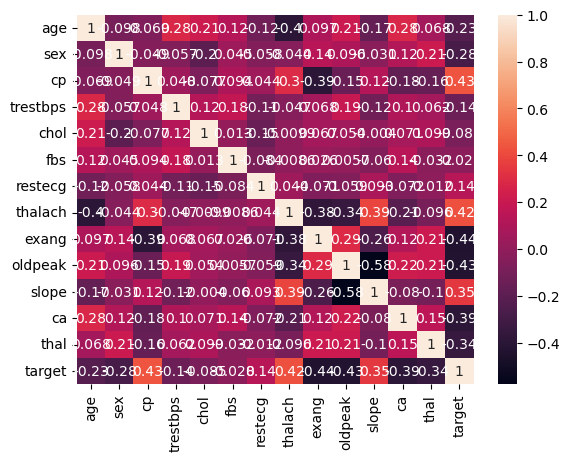

In [105]:
sns.heatmap(corr_ltion,annot=True)

#### B) Data Visualization:
a. Visualize the number of patients having a heart disease and not having a heart disease.
b. Visualize the age and weather patient has disease or not

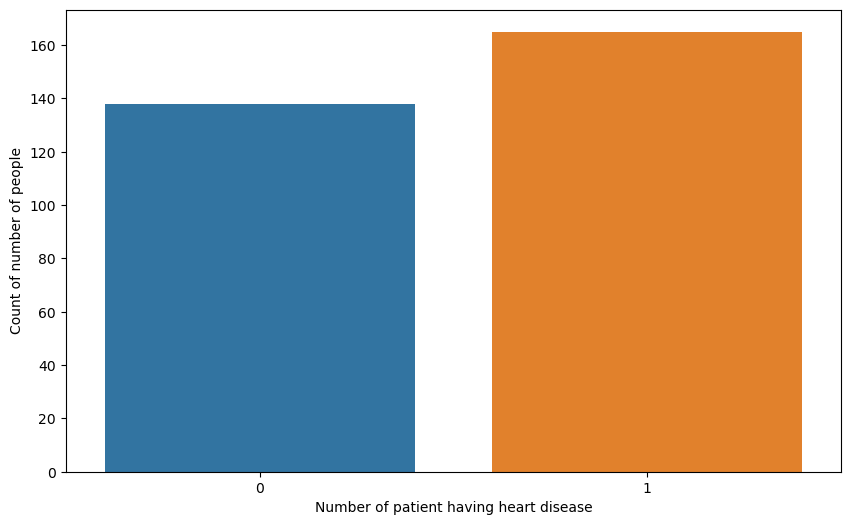

In [106]:
fig=plt.figure(figsize=(10,6))
sns.countplot(df['target'],data=df)
plt.xlabel('Number of patient having heart disease')
plt.ylabel('Count of number of people')
plt.show()

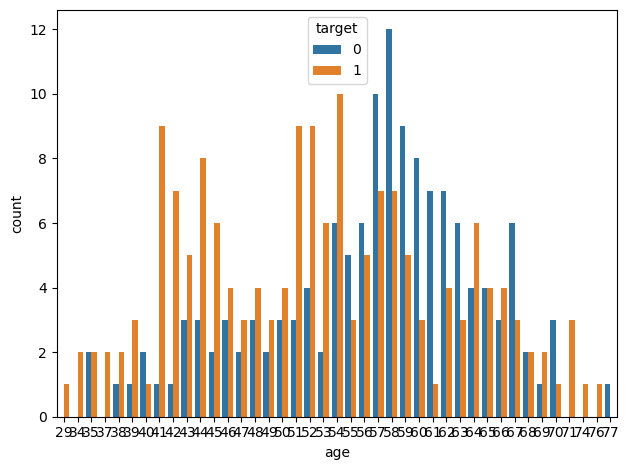

In [107]:
sns.countplot(df['age'],hue=df['target'])
plt.tight_layout()

#### Logistic Regression

In [108]:
X=df.drop("target",axis=1)
y=df['target']
X

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0     2  
3        2   0     2  
4        2   0     2  
..     ...  ..   ...  
298      1   0     3  
299      1   0     3  
300      1   2     3  
301      1   1     3  
302      1   1     2  

[303 rows x 13 columns]

In [109]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)


In [110]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1], dtype=int64)

In [111]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8131868131868132
[[32  9]
 [ 8 42]]
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



#### Decision Tree

In [112]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
classifier=DecisionTreeClassifier()
cv=KFold(n_splits=10,shuffle=False)
grid={'criterion':['gini','entropy','log_loss'],
     'splitter':['best','random'],
     'max_depth':[2,3,4],
     'max_features':['auto','sqrt','log2'],
     'min_samples_split':[1,2,3,4]}
clf=GridSearchCV(estimator=classifier,param_grid=grid,cv=cv,n_jobs=-1,verbose=2)
clf


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [1, 2, 3, 4],
                         'splitter': ['best', 'random']},
             verbose=2)

In [113]:
clf.fit(X_train,y_train)

Fitting 10 folds for each of 216 candidates, totalling 2160 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [1, 2, 3, 4],
                         'splitter': ['best', 'random']},
             verbose=2)

In [114]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_split': 4,
 'splitter': 'random'}

In [115]:
best=clf.best_estimator_
best

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features='auto',
                       min_samples_split=4, splitter='random')

In [116]:
y_pred=best.predict(X_test)

#### Metrics

In [117]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))


0.7802197802197802
              precision    recall  f1-score   support

           0       0.78      0.71      0.74        41
           1       0.78      0.84      0.81        50

    accuracy                           0.78        91
   macro avg       0.78      0.77      0.78        91
weighted avg       0.78      0.78      0.78        91

[[29 12]
 [ 8 42]]


In [118]:
cnf=accuracy_score(y_test,y_pred)
cnf

0.7802197802197802

[Text(0.5357142857142857, 0.9, 'X[6] <= 0.842\nentropy = 0.995\nsamples = 212\nvalue = [97, 115]'),
 Text(0.30952380952380953, 0.7, 'X[11] <= 2.299\nentropy = 0.999\nsamples = 100\nvalue = [52, 48]'),
 Text(0.19047619047619047, 0.5, 'X[11] <= 1.097\nentropy = 0.999\nsamples = 91\nvalue = [44, 47]'),
 Text(0.09523809523809523, 0.3, 'X[11] <= 0.908\nentropy = 0.98\nsamples = 79\nvalue = [33, 46]'),
 Text(0.047619047619047616, 0.1, 'entropy = 0.845\nsamples = 55\nvalue = [15, 40]'),
 Text(0.14285714285714285, 0.1, 'entropy = 0.811\nsamples = 24\nvalue = [18, 6]'),
 Text(0.2857142857142857, 0.3, 'X[9] <= 0.94\nentropy = 0.414\nsamples = 12\nvalue = [11, 1]'),
 Text(0.23809523809523808, 0.1, 'entropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(0.3333333333333333, 0.1, 'entropy = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.42857142857142855, 0.5, 'X[5] <= 0.284\nentropy = 0.503\nsamples = 9\nvalue = [8, 1]'),
 Text(0.38095238095238093, 0.3, 'entropy = 0.0\nsamples = 7\nvalue = [7, 0]'),
 T

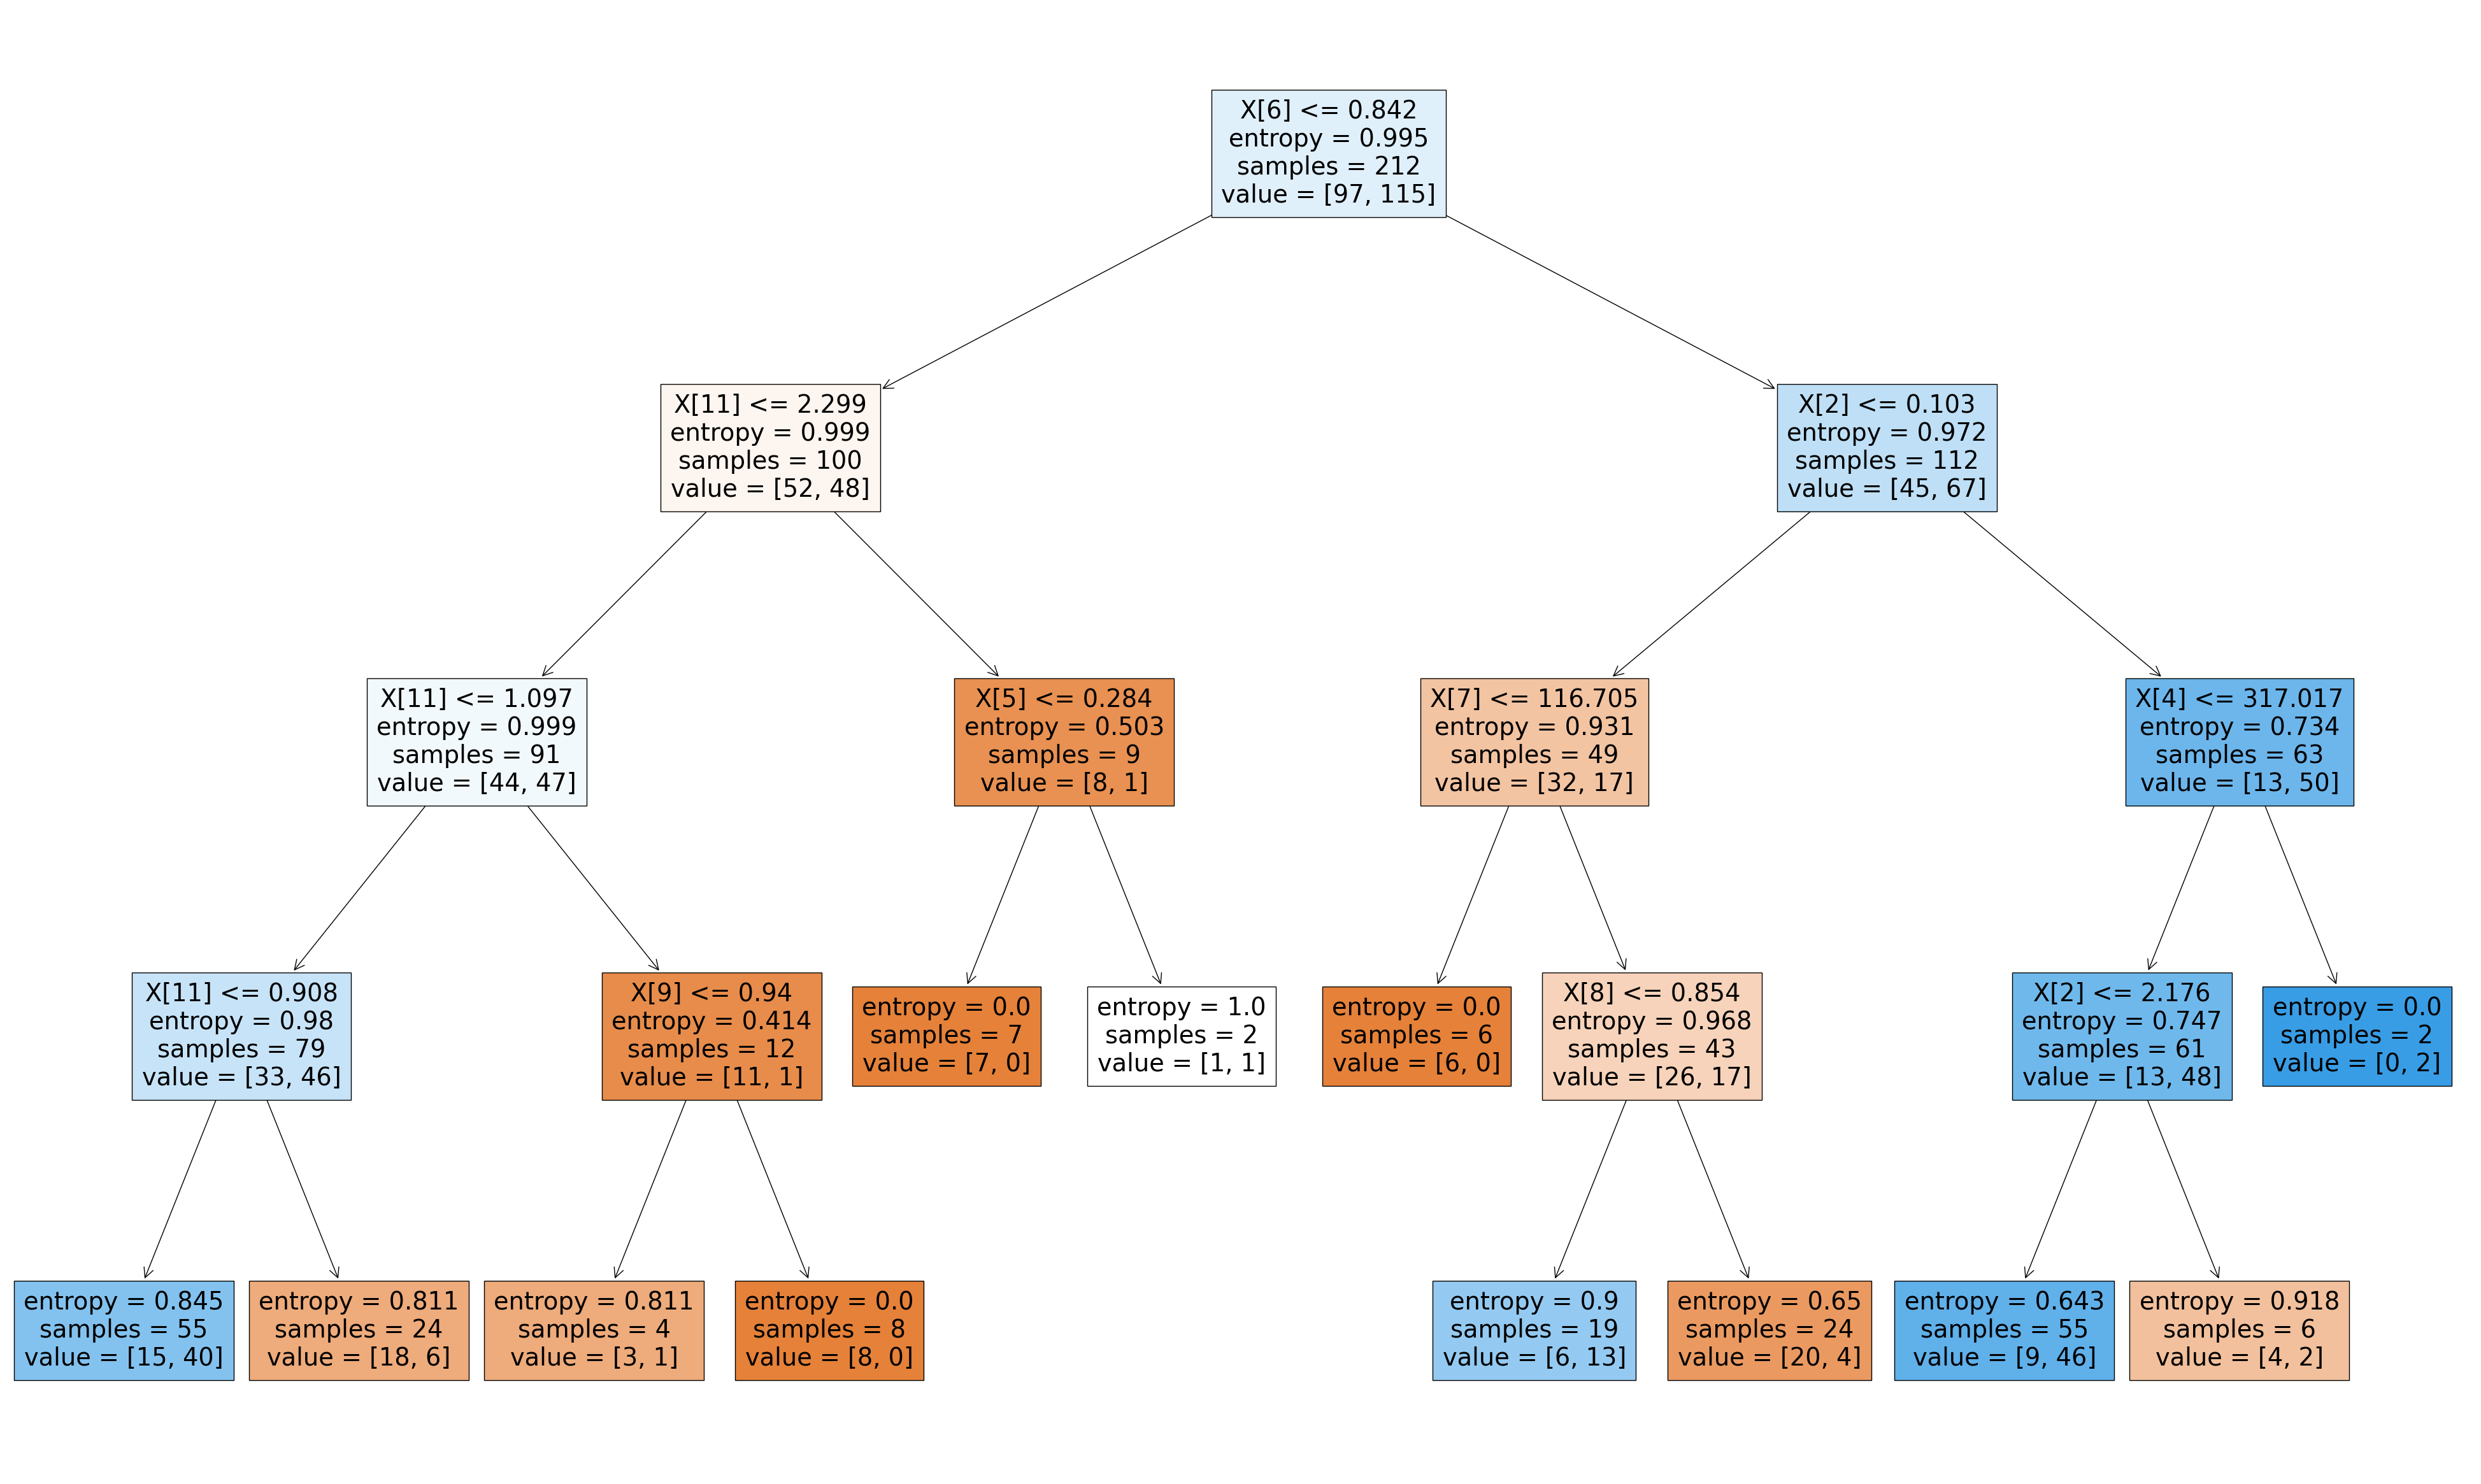

In [131]:
from sklearn import tree
fig=plt.figure(figsize=(50,30))

tree.plot_tree(best,filled=True)

#### RandomForestClassifier

In [125]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
X=df.iloc[:,:-1]
y=df['target']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)
model1=RandomForestClassifier()
model1

RandomForestClassifier()

In [126]:
X

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0     2  
3        2   0     2  
4        2   0     2  
..     ...  ..   ...  
298      1   0     3  
299      1   0     3  
300      1   2     3  
301      1   1     3  
302      1   1     2  

[303 rows x 13 columns]

In [128]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [127]:
model1.fit(X_train,y_train)

RandomForestClassifier()

In [122]:
y_pred=model1.predict(X_test)

#### Metrics

In [123]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))


0.8131868131868132
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91

[[32  9]
 [ 8 42]]


In [124]:
model1.estimators_


[DecisionTreeClassifier(max_features='auto', random_state=612265153),
 DecisionTreeClassifier(max_features='auto', random_state=228584522),
 DecisionTreeClassifier(max_features='auto', random_state=601377994),
 DecisionTreeClassifier(max_features='auto', random_state=1795967914),
 DecisionTreeClassifier(max_features='auto', random_state=915394559),
 DecisionTreeClassifier(max_features='auto', random_state=1775284927),
 DecisionTreeClassifier(max_features='auto', random_state=1424274783),
 DecisionTreeClassifier(max_features='auto', random_state=466096176),
 DecisionTreeClassifier(max_features='auto', random_state=402996222),
 DecisionTreeClassifier(max_features='auto', random_state=1931869090),
 DecisionTreeClassifier(max_features='auto', random_state=2129743566),
 DecisionTreeClassifier(max_features='auto', random_state=456509328),
 DecisionTreeClassifier(max_features='auto', random_state=1354602932),
 DecisionTreeClassifier(max_features='auto', random_state=1149815847),
 DecisionTree

In [87]:
feature_names

[['cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak']]

In [90]:
class_name

'target'

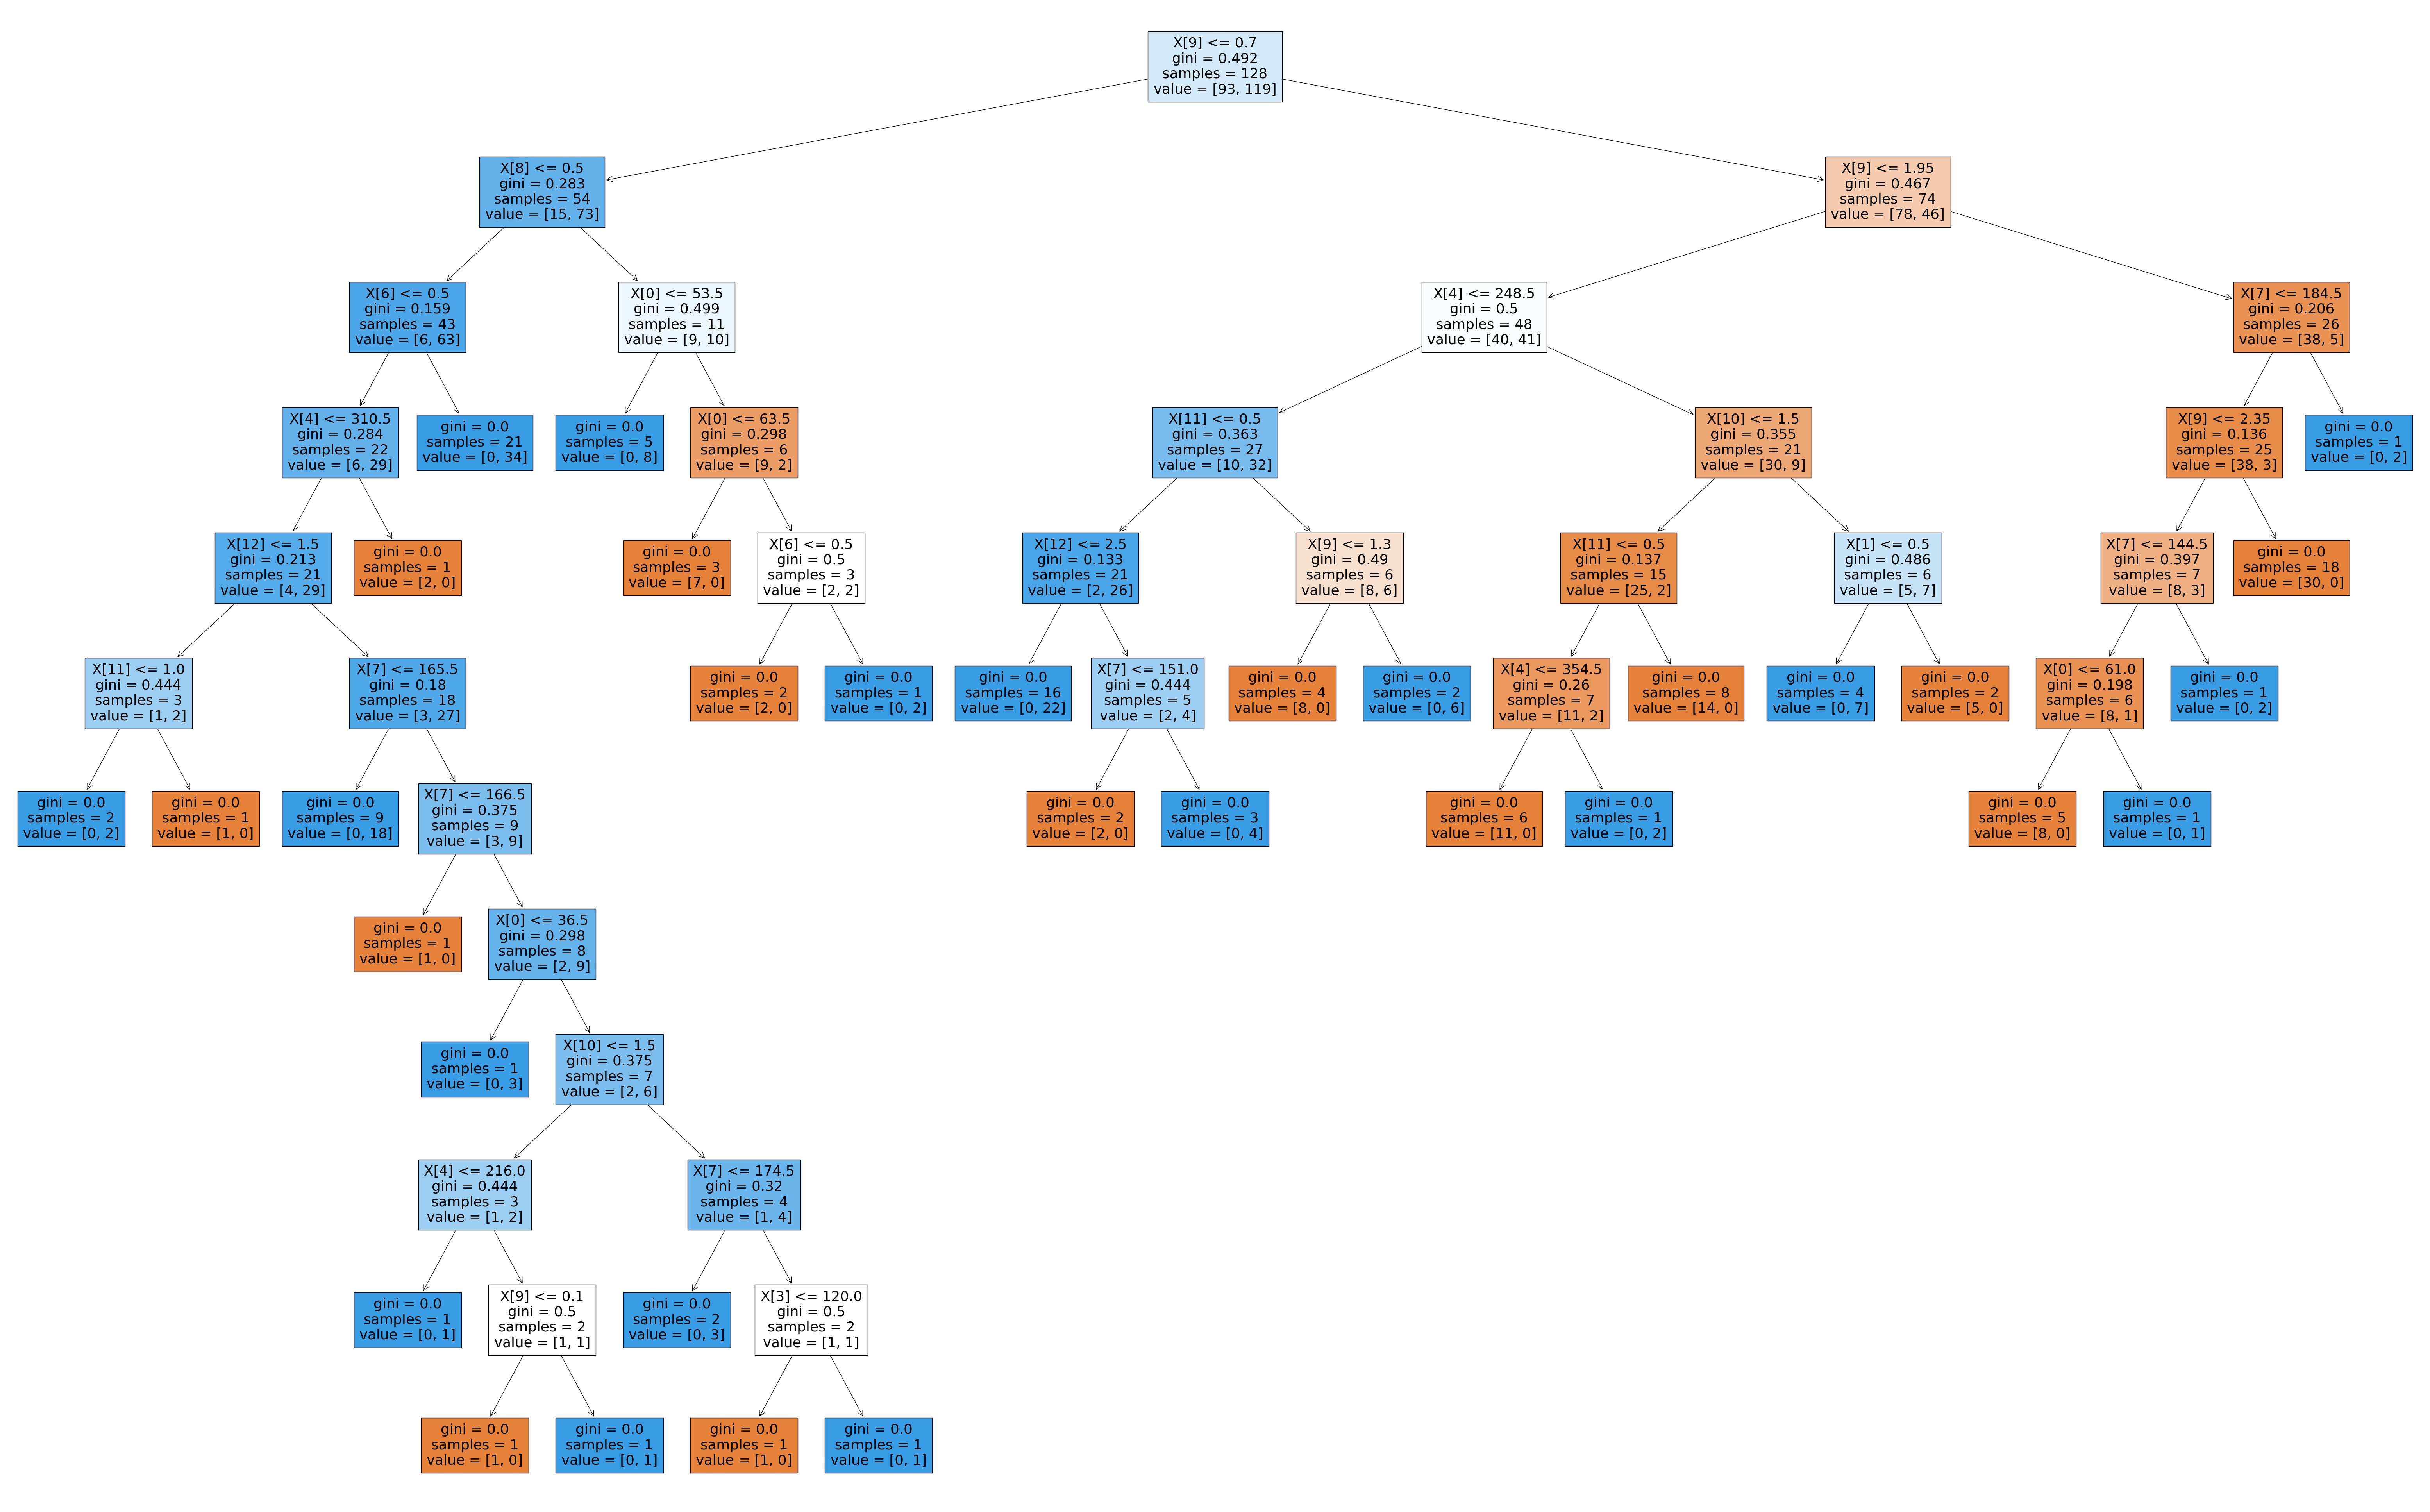

In [138]:
from sklearn import tree
figure=plt.figure(figsize=(80,50))
model1.estimators_
for i in range(len(model1.estimators_)):
    tree.plot_tree(model1.estimators_[10],filled=True)

#### Random Forest Classifier is the well suited model for Heart Disease 